# EE954 : Deep Learning Fundamentals
### Assignment 1

**Group Number:** 12  
**Team Members:**  
- Lokesh  (Roll No: 241562482)  
- Akshay (Roll No: _____)

---



#### Importing Libraries &#8595;

In [1]:
import numpy as np
from torchvision import datasets
import kagglehub
import shutil
import os
import pandas as pd
from sklearn.model_selection import train_test_split

#### 1.1 Download and Split &#8595;

General Instructions 
• Late submissions will not be accepted. 
• Any form of plagiarism will result inpenalties. If you refer to any online material or books,cite them properly. 
• You may use Google Colab or Kaggle to train your models. 
• The use of the Numpy library is permitted. 
• The use of Tensor Flow library is strictly prohibited. 
• The use of PyTorch library is allowed with restrictions.

DatasetPreparation (5Marks)

1.1 Download and Split (2Marks)

•Download the Fashion-MNIST dataset. You can either download it from here,or import it directly into your code using PyTorch’s torchvision.datasets module. 

• Both sources provide separate training and test splits; however, you will need to create a separate validation set from the training data.

From Perplexity.AI - '

Fashion-MNIST is a widely used machine learning dataset consisting of 70,000 grayscale images (28x28 pixels) of fashion items from 10 categories, such as T-shirts, trousers, dresses, and shoes. There are 60,000 images for training and 10,000 for testing. Each image is labeled with one of the 10 clothing classes. Fashion-MNIST was designed as a more challenging, modern replacement for the original MNIST handwritten digits dataset, while maintaining the same format and structure for easy benchmarking and comparison of machine learning algorithms.

Each example is a 28x28 grayscale image of a fashion item, labeled with one of 10 classes: 0: T-shirt/top 1: Trouser 2: Pullover 3: Dress 4: Coat 5: Sandal 6: Shirt 7: Sneaker 8: Bag 9: Ankle boot

'

Documentation on dataset - https://github.com/zalandoresearch/fashion-mnist

In [14]:
# where the MNIST data will be saved permanently
BASE_DIR = os.getcwd()
DATA_DIR = os.path.join(BASE_DIR, "..", "datasets")

# Download dataset to the default directory
path = kagglehub.dataset_download("zalando-research/fashionmnist")

# Copy the downloaded the dataset to the desired path
shutil.copytree(path, DATA_DIR, dirs_exist_ok=True)

if os.path.exists(DATA_DIR) and os.listdir(DATA_DIR):
    print(f"Dataset copied successfully to: {DATA_DIR}")
    print("Contents:")
    for f in os.listdir(DATA_DIR):
        print(" -", f)
else:
    print("Dataset folder is missing or empty!")

train_file = os.path.join(DATA_DIR, "fashion-mnist_train.csv")
test_file = os.path.join(DATA_DIR, "fashion-mnist_test.csv")

df = pd.read_csv(train_file)
X = df.drop('label', axis=1)
y = df['label']

X = X.to_numpy()
y = y.to_numpy()

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=42)

Dataset copied successfully to: c:\Users\aksha\OneDrive\Desktop\Education Courses\IITK AI ML\GitHub\EE954_DLF\..\datasets
Contents:
 - fashion-mnist_test.csv
 - fashion-mnist_train.csv
 - t10k-images-idx3-ubyte
 - t10k-labels-idx1-ubyte
 - train-images-idx3-ubyte
 - train-labels-idx1-ubyte


### Data Augmentation <img src="https://r2cdn.perplexity.ai/pplx-full-logo-primary-dark%402x.png" class="logo" width="120"/>

For most computer vision tasks, **on-the-fly (online) augmentation**-applying random flips and rotations during training-is the recommended approach over creating and storing new augmented data entries. Here’s why:

- **Efficiency:** On-the-fly augmentation is more efficient in terms of storage and computation. You don’t need to physically expand your dataset, which saves disk space and avoids data duplication[^1][^3][^4][^5].
- **Diversity:** Each epoch, the model sees new, randomly augmented variations of the same images, effectively increasing the diversity of your training data and helping prevent overfitting[^2][^3][^4].
- **Scalability:** For large datasets, storing all possible augmented versions is impractical. On-the-fly methods scale easily to any dataset size[^4][^5].
- **Flexibility:** You can easily experiment with different augmentation strategies and intensities without having to regenerate and store multiple datasets[^1][^2].

**Static augmentation** (saving new images) can be helpful for very small datasets or for research scenarios where you need to inspect or share specific augmented samples[^1][^5]. However, for most practical deep learning workflows-especially with modern frameworks like PyTorch and TensorFlow-on-the-fly augmentation is the preferred and standard method.

**Recommendation:**
Use random flips and rotations on-the-fly during training for efficiency, scalability, and improved model generalization[^2][^3][^4][^5].

<div style="text-align: center">⁂</div>

[^1]: https://pmc.ncbi.nlm.nih.gov/articles/PMC8455796/

[^2]: https://keylabs.ai/blog/data-augmentation-for-improving-image-classification-accuracy/

[^3]: https://milvus.io/ai-quick-reference/how-is-random-flipping-used-in-data-augmentation

[^4]: https://alecstashevsky.com/post/on-the-fly-augmentation-with-pytorch-geometric-and-lightning-what-tutorials-dont-teach/

[^5]: https://www.kdnuggets.com/2018/05/data-augmentation-deep-learning-limited-data.html

[^6]: https://www.v7labs.com/blog/data-augmentation-guide

[^7]: https://www.lyzr.ai/glossaries/data-augmentation/

[^8]: https://www.reddit.com/r/learnmachinelearning/comments/kmp59z/on_the_fly_data_augmentation_vs_saving_out/

[^9]: https://www.albumentations.ai/docs/1-introduction/what-are-image-augmentations/

[^10]: https://www.f22labs.com/blogs/what-is-data-augmentation/

[^11]: https://celerdata.com/glossary/a-comprehensive-guide-to-data-augmentation-strategies

[^12]: https://stackoverflow.com/questions/42141540/image-augmentation-makes-performance-worse

[^13]: https://www.restack.io/p/data-augmentation-answer-on-the-fly-cat-ai

[^14]: https://blog.roboflow.com/data-augmentation/

[^15]: https://www.digitalocean.com/community/tutorials/data-augmentation-for-object-detection-rotation-and-shearing

[^16]: https://blog.paperspace.com/data-augmentation-for-bounding-boxes/

[^17]: https://www.ccslearningacademy.com/what-is-data-augmentation/

[^18]: https://www.datacamp.com/tutorial/complete-guide-data-augmentation

[^19]: https://www.sciencedirect.com/science/article/pii/S2590005622000911

[^20]: https://encord.com/blog/data-augmentation-guide/



### Code for Data Augmentation:


def flip_horizontal(flat_img):

    """Flips a flattened 28x28 image horizontally"""

    return np.fliplr(flat_img.reshape(28, 28)).flatten()



def flip_vertical(flat_img):

    """Flips a flattened 28x28 image vertically"""

    return np.flipud(flat_img.reshape(28, 28)).flatten()



def augment_with_flips(dataset, flip_type='horizontal', flip_ratio=0.50, seed=42):

    """Augments dataset by flipping specified ratio of images"""

    np.random.seed(seed)

    n = len(dataset)

    print(f"Number of images in dataset: {n}")

    print(f"Flipping {int(n * flip_ratio)} images {flip_type}ly")

    indices = np.random.choice(n, int(n * flip_ratio), replace=False)

    print(f"Indices chosen for flipping: {indices}")

    flipped = dataset.copy()

    flip_fn = flip_horizontal if flip_type == 'horizontal' else flip_vertical



    for i in indices:

        flipped[i] = flip_fn(flipped[i])



    return flipped



# Usage with your 48,000-image dataset

#augmented_horizontal = augment_with_flips(X_train, flip_type='horizontal') 

#augmented_vertical = augment_with_flips(X_train, flip_type='vertical')



# To combine both flips (50% horizontal + 50% vertical):

combined_augmented = np.concatenate([X_train, augment_with_flips(X_train, 'horizontal'),augment_with_flips(X_train, 
'vertical')])



import matplotlib.pyplot as plt



def plot_sample(original, flipped, title):

    fig, (ax1, ax2) = plt.subplots(1, 2)

    ax1.imshow(original.reshape(28, 28), cmap='gray')

    ax1.set_title('Original')

    ax2.imshow(flipped.reshape(28, 28), cmap='gray')

    ax2.set_title(title)

    plt.show()



sample_idx = 3  # Change to see different examples

plot_sample(X_train[sample_idx],flip_vertical(flip_horizontal(X_train[sample_idx])),"Horizontally Flipped")

Number of images in dataset: 48000
Flipping 24000 images horizontally
Indices chosen for flipping: [32771 39512 43581 ... 19526  5217 12164]
Number of images in dataset: 48000
Flipping 24000 images vertically
Indices chosen for flipping: [32771 39512 43581 ... 19526  5217 12164]


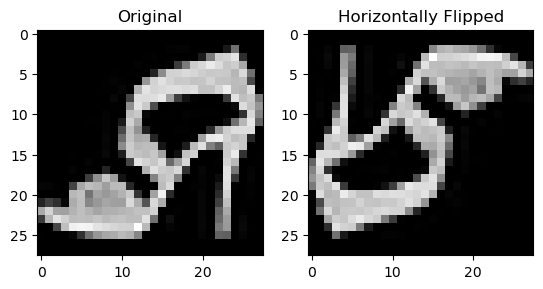

In [8]:
X_train.shape

(48000, 784)

### The dataset downloaded from Kaggle is already flattened. 
Notes from Kaggle:  

'Content
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.
For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.'

#### 1.2 Data Preprocessing (3 Marks)
• Define a preprocess function to preprocess the images. (The function should have
the same name).

• The function should flatten the images.

• The function should also normalize the pixel values to the range [0, 1]. Depending
on how you have implemented the code so far, the pixel values might already be
normalized to this range. However, for clarity and completeness, include an explicit
normalization step regardless. &#8595;

In [20]:
# Inspecting data before preprocessing:

print(f"X_train Shape: {X_train.ndim}")
print(f"y_train Shape: {y_train.ndim}") 
print(f"Max pixel value in X_train is {X_train.max()}")
print(f"Min pixel value X_train is {X_train.min()}")  

print(f"X_val Shape: {X_val.ndim}")
print(f"y_val Shape: {y_val.ndim}") 
print(f"Max pixel value in X_val is {X_val.max()}")
print(f"Min pixel value X_val is {X_val.min()}") 

X_train Shape: 2
y_train Shape: 1
Max pixel value in X_train is 255
Min pixel value X_train is 0
X_val Shape: 2
y_val Shape: 1
Max pixel value in X_val is 255
Min pixel value X_val is 0


In [16]:
def preprocess_(X):
    if X.ndim == 3:                     # We know that the image is already flattened when used from the KaggleHub dataset, however we are checking for safety
        X = X.reshape(X.shape[0], -1)   # Flatten each image
    if X.max() > 1:
        X = X / 255.0                  # We also saw from above that the dataset while being flattened is not normalized - so we normalize it here
    return X


class Preprocessor:
    def __init__(self, X, y=None):
        self.X_raw = X
        self.y_raw = y
        self.X = None
        self.y = None

    def apply(self):
        """Apply preprocessing using preprocess_() function."""
        self.X = preprocess_(self.X_raw)
        self.y = self.y_raw
        return self.X, self.y

    def get_data(self):
        """Return already-preprocessed data."""
        if self.X is None:
            raise ValueError("Call `.apply()` before using get_data()")
        return self.X, self.y


# Wrap your existing datasets
prep_train = Preprocessor(X_train, y_train)
prep_val = Preprocessor(X_val, y_val)

X_train_clean, y_train_clean = prep_train.apply()
X_val_clean, y_val_clean = prep_val.apply()


In [22]:
###   Checks again post-preprocessing

print(f"X_train_clean Shape: {X_train_clean.ndim}")
print(f"y_train_clean Shape: {y_train_clean.ndim}") 
print(f"Max pixel value in X_train_clean is {X_train_clean.max()}")
print(f"Min pixel value X_train_clean is {X_train_clean.min()}")  

print(f"X_val_clean Shape: {X_val_clean.ndim}")
print(f"y_train_clean Shape: {y_val_clean.ndim}") 
print(f"Max pixel value in X_val_clean is {X_val_clean.max()}")
print(f"Min pixel value X_val_clean is {X_val_clean.min()}")

X_train_clean Shape: 2
y_train_clean Shape: 1
Max pixel value in X_train_clean is 1.0
Min pixel value X_train_clean is 0.0
X_val_clean Shape: 2
y_train_clean Shape: 1
Max pixel value in X_val_clean is 1.0
Min pixel value X_val_clean is 0.0


 #### Activation Function &#8595;

In [6]:
def activation(activation_type, z):
    if activation_type == 'relu':
        return np.maximum(0, z)
    if activation_type == 'sigmoid':
        return 1/(1+np.exp(-z))
    if activation_type == 'tanh':
        return (np.tanh(z))
    else:
        raise ValueError("Unsupported activation type. Use 'relu', 'sigmoid', or 'tanh'.")
    

#### Forward Propagation  &#8595;

In [5]:
X = df.drop('label', axis=1)
y = df['label']

#Total number of classes to be predicted
n_classes = len(np.unique(y))
print(n_classes)

print(f"X dataframe shape{X.shape}")
print(f"y dataframe shape{y.shape}")

10
X dataframe shape(60000, 784)
y dataframe shape(60000,)


#### Backward Propagation  &#8595;

In [ ]:
class MLP(self, PreprocessedDataset):
    def init __super():
        self.PreprocessedDataset
    init __self__():
   
    X_train = preprocess(X_train)
    X_val = preprocess(X_val)

nn = MLP()
for _ in range(epochs):
    
    nn.forwardpropagation()
    nn.backpropagation()
    